<a href="https://colab.research.google.com/github/caffonso/Control/blob/main/Control2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  
### Sistemas Massa mola  


In [ ]:
pip install control

     |████████████████████████████████| 348kB 13.3MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344920 sha256=23d11f0fdbf83e9719be97d6cb312561e977acd05c02bfb2cc93c64a1aff4b4b
  Stored in directory: /root/.cache/pip/wheels/35/be/ee/081b68ca3e4b2d253fba2f7f7e51960373903fb7b6d13c5532
Successfully built control


In [ ]:
import numpy as np
import control
import matplotlib.pyplot as plt

# Sistema massa-mola
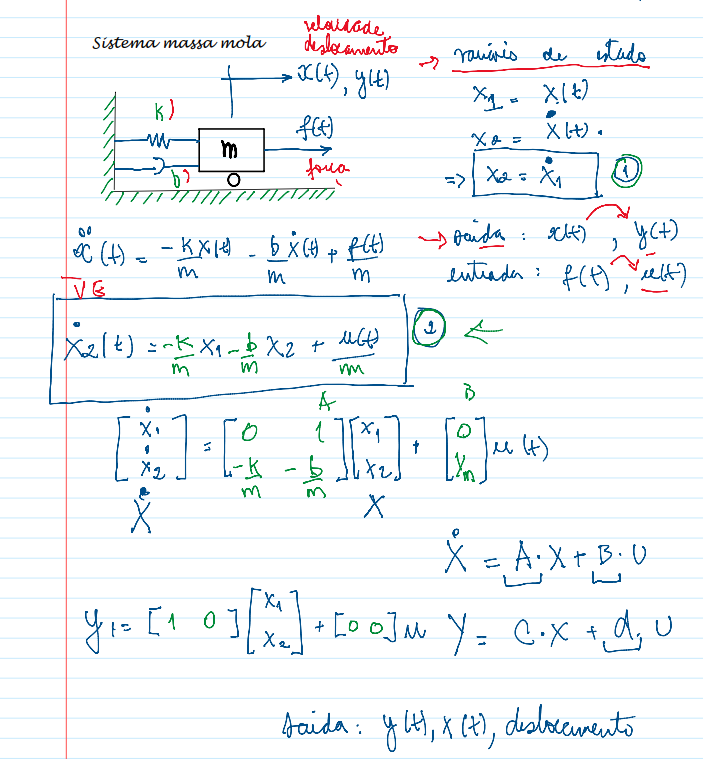

Matrizes 

 A: [[0, 1], [-0.4, -0.2]] 
 B:  [0, 0.5] 
 C:  [1, 0] 
 D:  [0] 



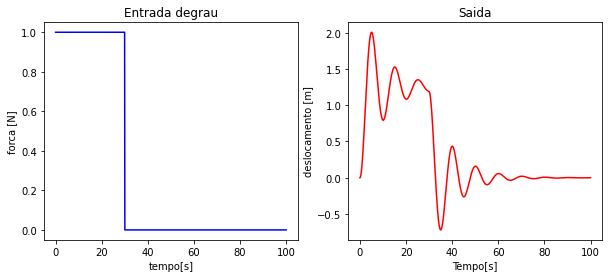

In [ ]:
#  Função de Estado
# Exemplo numérico 

k = .8  # N.m
b = .4  # Ns/m
m =  2  # Kg

A =[[    0,     1  ],
    [ -k/m,  -b/m  ]]
B = [    0,   1/m  ]   
C=  [    1,     0  ]
D = [0]

t  = np.linspace(0,100,1000)  # (start, stop, num ) 
u  = np.zeros((len(t)))
u[0:300] = 1
sys1 = control.ss(A,B,C,D)
t,y1  = control.forced_response(sys1,T = t , U = u ) 

print("Matrizes", 2*"\n", "A:",A,"\n","B: ",B,'\n',"C: ",C,"\n","D: ",D,"\n")
plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1) 
plt.title("Entrada degrau")
plt.plot(t,u,'b')
plt.ylabel("forca [N]") 
plt.xlabel('tempo[s]')
plt.subplot(1,2,2)  
plt.plot(t,y1,'r')
plt.title("Saida")
plt.ylabel("deslocamento [m]") 
plt.xlabel("Tempo[s]")
plt.show()


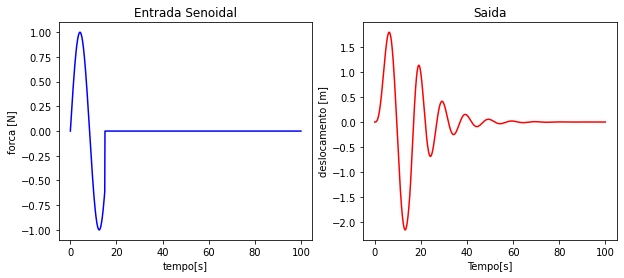

In [ ]:
u  = np.zeros((len(t)))
f  = .06
u[0:150]  = np.sin(2*np.pi*f*t[0:150])  
sys1 = control.ss(A,B,C,D)
t,y1  = control.forced_response(sys1,T = t , U = u ) 

plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1) 
plt.title("Entrada Senoidal")
plt.plot(t,u,'b')
plt.ylabel("forca [N]") 
plt.xlabel('tempo[s]')
plt.subplot(1,2,2)  
plt.plot(t,y1,'r')
plt.title("Saida")
plt.ylabel("deslocamento [m]") 
plt.xlabel("Tempo[s]")
plt.show()


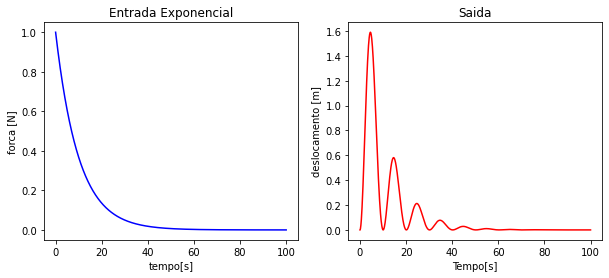

In [ ]:
tau  = 10 # tempo de decaimento
u    = np.zeros((len(t)))
u    = np.exp(-t/tau)  
sys1 = control.ss(A,B,C,D)
t,y1 = control.forced_response(sys1,T = t , U = u ) 

plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1) 
plt.title("Entrada Exponencial")
plt.plot(t,u,'b')
plt.ylabel("forca [N]") 
plt.xlabel('tempo[s]')
plt.subplot(1,2,2)  
plt.plot(t,y1,'r')
plt.title("Saida")
plt.ylabel("deslocamento [m]") 
plt.xlabel("Tempo[s]")
plt.show()


In [ ]:
t  = np.linspace(0,100,1000)  
u  = np.zeros((len(t)))
u  = np.exp(-t/tau)*np.sin(2*np.pi*f*t)   
sys1 = control.ss(A,B,C,D)
t,y1  = control.forced_response(sys1,T = t , U = u ) 

plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1) 
plt.title("Entrada Senoide amortecida")
plt.plot(t,u,'b')
plt.ylabel("forca [N]") 
plt.xlabel('tempo[s]')
plt.subplot(1,2,2)  
plt.plot(t,y1,'r')
plt.title("Saida")
plt.ylabel("deslocamento [m]") 
plt.xlabel("Tempo[s]")
plt.show()


NameError: ignored

# Sistema com duas saídas

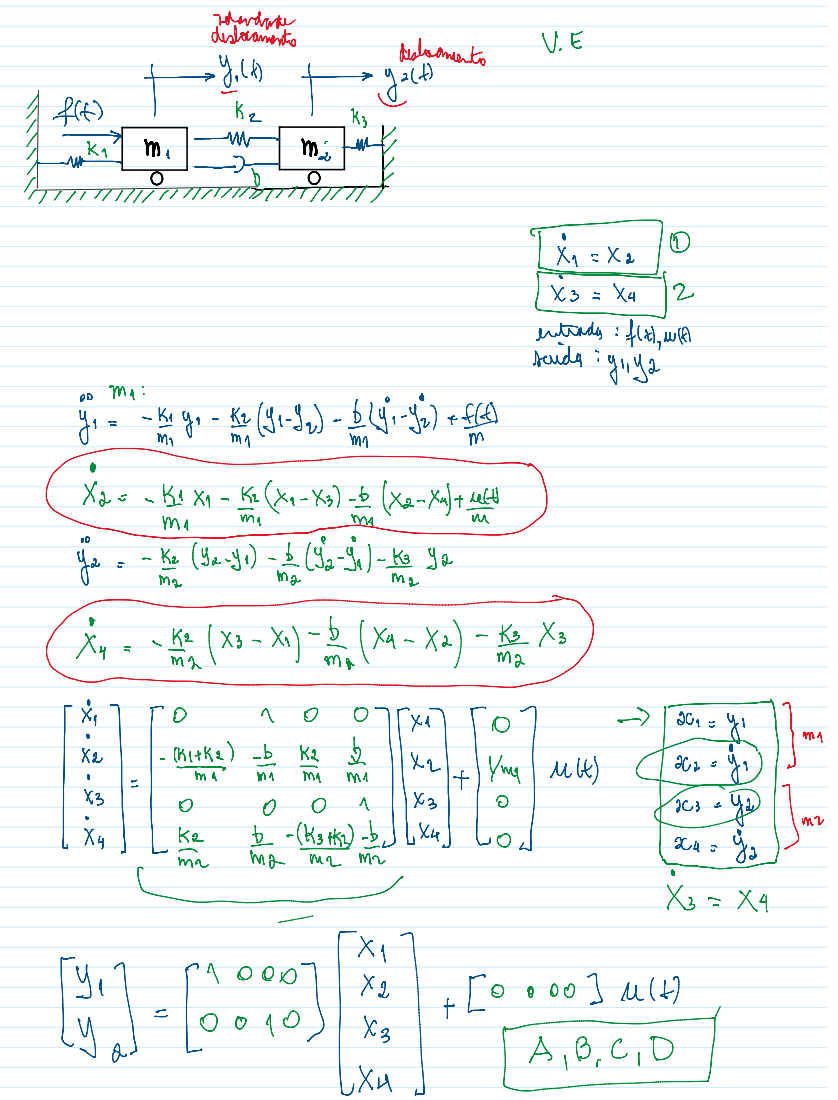




Matrizes 

 A: 
 [[ 0.     1.     0.     0.   ]
 [-0.03  -0.025  0.02   0.025]
 [ 0.     0.     0.     1.   ]
 [ 0.2    0.25  -0.35  -0.25 ]] 
 B:  
 [[0.  ]
 [0.05]
 [0.  ]
 [0.  ]] 
 C:  
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] 
 D:  
 [[0.]
 [0.]
 [0.]
 [0.]] 



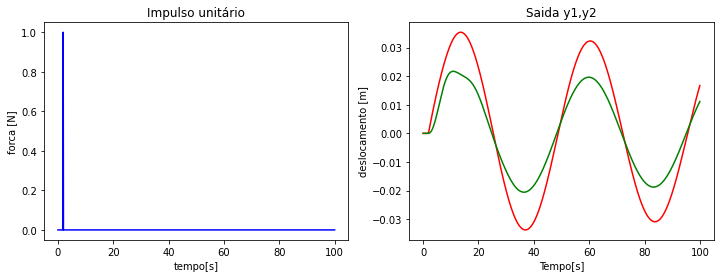

In [ ]:
u        = np.zeros(len(t))
u[19:20]  = 1                 # Inpulso unitário
k1       = .2   # N/m
k2       = .4   # N/m
k3       = .3   # N/m
m1       = 20   # Kg
m2       =  2   # Kg
b        = .5   # 1/s

A  =[[         0,       1,          0,        0],
    [-(k1+k2)/m1,   -b/m1,      k2/m1,     b/m1],
    [          0,       0,          0,        1],
    [      k2/m2,    b/m2,-(k2+k3)/m2,    -b/m2]]
B  = np.zeros((4,1)) 
B[1,0] = 1/m1
C  = np.zeros((4,4))
C[0,0],C[1,2] = 1,1
D  = np.zeros((4,1))

sys   = control.ss(A,B,C,D)
t,y   = control.forced_response(sys ,T = t , U = u ) 

# impresão dos resultados
print("Matrizes", 2*"\n", "A:","\n",np.round(A,3),"\n","B: ","\n",B,'\n',"C: ","\n",C,"\n","D: ","\n",D,"\n")
plt.figure(figsize=(12,4)) 
plt.subplot(1,2,1) 
plt.title("Impulso unitário")
plt.plot(t,u,'b')
plt.ylabel("forca [N]") 
plt.xlabel('tempo[s]')
plt.subplot(1,2,2)  
plt.plot(t,y[0,:],'r')
plt.plot(t,y[1,:],'g')
plt.title("Saida y1,y2")
plt.ylabel("deslocamento [m]") 
plt.xlabel("Tempo[s]")

plt.show()

## Atividade 1: 
Simule a resposta a uma entrada do tipo degrau unitário para o sistema massa mola a seguir:

k = 2  # N.m

b = 4  # Ns/m

m = 20 # Kg

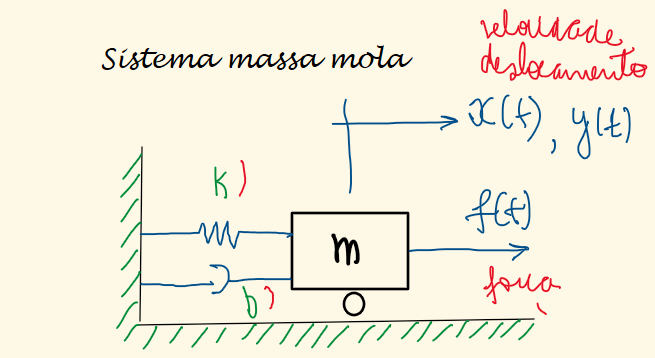

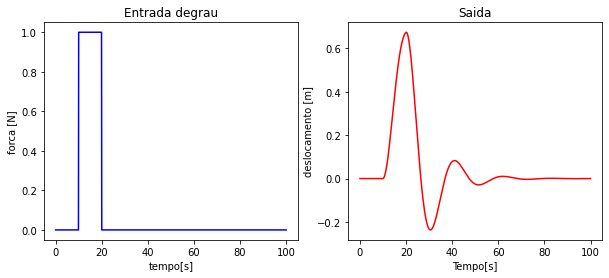

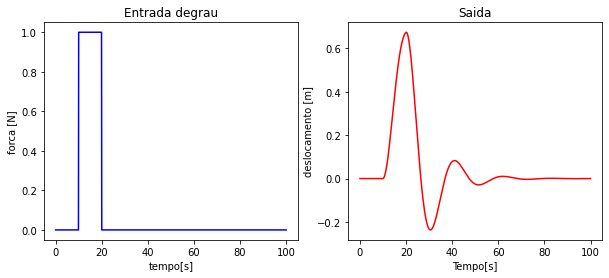

In [ ]:
#  Modifique o programa a seguir 

k = 2
b = 4
m = 20

A =[[       0,   1  ],
    [    -k/m,  -b/m  ]]
B = [       0,   1/m  ]   
C=  [       1,   0  ]
D = [0]

t  = np.linspace(0,100,1000)
u  = np.zeros(len(t))
u[100:200] = 1
sys1 = control.ss(A,B,C,D)
t,y1  = control.forced_response(sys1,T=t,U=u)

# impresão dos resultados
plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1) 
plt.title("Entrada degrau")
plt.plot(t,u,'b')
plt.ylabel("forca [N]") 
plt.xlabel('tempo[s]')
plt.subplot(1,2,2)  
plt.plot(t,y1,'r')
plt.title("Saida")
plt.ylabel("deslocamento [m]") 
plt.xlabel("Tempo[s]")
plt.show()

# Atividade 2 
Encontre a saida do modelo a seguir para uma entrada senoide

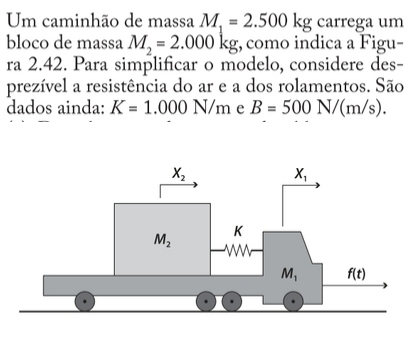

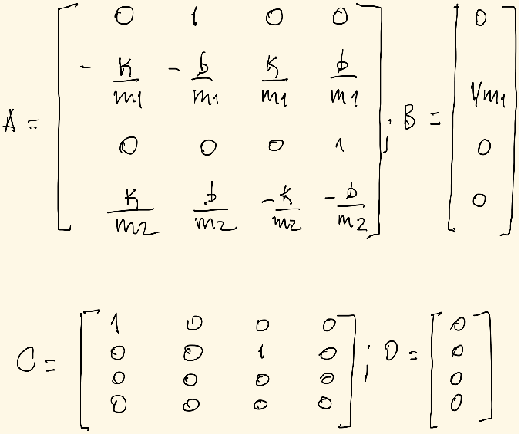

Acertou !!


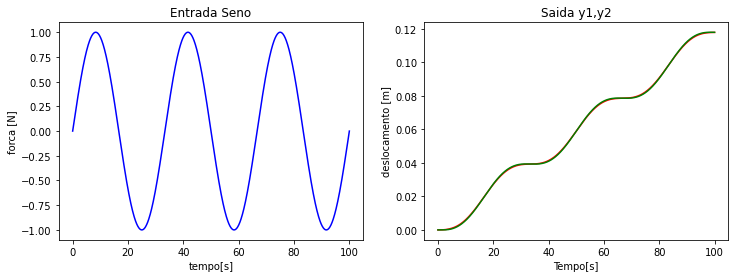

In [ ]:
u        = np.zeros(len(t))
f        = .03
u = np.sin(2*np.pi*f*t)

# Altere o programa  
k        = 1000
m1       = 2500
m2       = 2000
b        = 500

A  = [[    0,     1,    0,       0], 
      [-k/m1, -b/m1,  k/m1,   b/m1], 
      [    0,     0,     0,      1], 
      [ k/m2,  b/m2,  -k/m2, -b/m2]]
 


B  = np.zeros((4,1)) 
B[1,0] = 1/m1
C  = np.zeros((4,4))
C[0,0],C[1,2] = 1, 1 
D  = np.zeros((4,1))
sys   = control.ss(A,B,C,D)
t,y   = control.forced_response(sys ,T = t , U = u ) 

# impresão dos resultados
print("Matrizes", 2*"\n", "A:","\n",np.round(A,3),"\n","B: ","\n",B,'\n',"C: ","\n",C,"\n","D: ","\n",D,"\n")
if sum(y[0,:]) == 58.94419037439915 : print("Acertou !!")
plt.figure(figsize=(12,4)) 
plt.subplot(1,2,1) 
plt.title("Entrada Seno")
plt.plot(t,u,'b')
plt.ylabel("forca [N]") 
plt.xlabel('tempo[s]')
plt.subplot(1,2,2)  
plt.plot(t,y[0,:],'r')
plt.plot(t,y[1,:],'g')
plt.title("Saida y1,y2")
plt.ylabel("deslocamento [m]") 
plt.xlabel("Tempo[s]")

plt.show()